# Abijeet Dhillon

# Research question/interests

With this project, I hope to determine which countries produce the highest percentage of their energy via coal when compared to that country's overall energy mix and which countries produce the lowest percentage of their energy via coal when compared to that country's overall energy mix? I am interested in this dataset since it describes the shift, or lack of, countries have undergone to adjust their means of producing energy to become more environmentally conscious (more specifically shifting away from coal). A specific question I have is which country has made the largest reduction in their usage of coal to produce energy. Lastly, I want to look at the most energy producing via coal countries in 1990 and see if they're the same in 2018. I could imagine myself building a user friendly dashboard with this dataset since there is a lot of useful and up-to-date data in this dataset.

# Milestone 3 Task 1:

In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Description of the dataset:
This data was provided by [Our World in Data](https://ourworldindata.org/), a non-profit organization that focuses on the large problems around the world.
Our dataset includes data on each countries energy consumption, energy mix, electricity mix, and related metrics for the past decades.
Our data was collected from 1965 to 2021.
The purpose of our dataset is to help show the public that our world lacks efficient, clean, and inexpensive alternatives to fossil fuels.
Our data was collected by a team of researchers who used numerous different datasets from multiple countries and compiled them together into a comprehensive dataset.

## Loading the dataset

In [2]:
df = pd.read_csv('../data/raw/owid-energy-data.csv')

## Exploring the Dataset
My research questions are pertaining to all things coal, therefore I will keep only columns that include coal, and the country and year columns.
- Interesting/Relevant Columns Include:

In [47]:
relevant_columns_df = pd.read_csv("https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-codebook.csv")
relevant_columns_df.loc[relevant_columns_df["column"].str.contains("coal_")]
# # Print the relevant columns into a form which will be easy to keep them in the dataframe
# for column in relevant_columns_df["column"]:
#     print(f"'{column}', ")

,column,description,source
14,coal_cons_change_pct,Annual percentage change in coal consumption,Calculated by Our World in Data based on BP St...
15,coal_cons_change_twh,"Annual change in coal consumption, measured in...",Calculated by Our World in Data based on BP St...
16,coal_cons_per_capita,Per capita primary energy consumption from coa...,Calculated by Our World in Data based on BP St...
17,coal_consumption,"Primary energy consumption from coal, measured...",Calculated by Our World in Data based on BP St...
18,coal_elec_per_capita,"Per capita electricity generation from coal, m...",Calculated by Our World in Data based on BP St...
19,coal_electricity,"Electricity generation from coal, measured in ...",Calculated by Our World in Data based on BP St...
20,coal_prod_change_pct,Annual percentage change in coal production,Calculated by Our World in Data based on BP St...
21,coal_prod_change_twh,"Annual change in coal production, measured in ...",Calculated by Our World in Data based on BP St...
22,coal_prod_per_capita,"Per capita coal production, measured in kilowa...",Calculated by Our World in Data based on BP St...
23,coal_production,"Coal production, measured in terawatt-hours",Calculated by Our World in Data based on BP St...


## Initial Thoughts
Nothing is really surprising about this dataset, it is very thorough and contains all of the information pertaining to my research questions.

I think I will lean towards an EDA using some of the columns listed above since they all are relevant towards my research questions.

## Data Wrangling
To wrangle this data, I will only keep the columns which were listed above.

In [17]:
# Creating a new dataframe from the old one which only contains the columns mentioned above
df = df[['country', 'year', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy']]
df


,country,year,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy
0,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN
1,Afghanistan,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
2,Afghanistan,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
3,Afghanistan,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
4,Afghanistan,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,Zimbabwe,2017,NaN,NaN,NaN,NaN,212.129,3.02,8.375,1.697,1542.302,21.957,41.313,NaN
22339,Zimbabwe,2018,NaN,NaN,NaN,NaN,255.561,3.69,14.336,3.148,1738.714,25.105,40.416,NaN
22340,Zimbabwe,2019,NaN,NaN,NaN,NaN,247.175,3.62,-21.529,-5.405,1345.127,19.700,32.007,NaN
22341,Zimbabwe,2020,NaN,NaN,NaN,NaN,231.448,3.44,3.004,0.592,1365.268,20.292,30.963,NaN


Now, we will clean this data by removing NaN entries and sorting them by year.

In [40]:
# Creating another new data frame from the old one which drops all NaN entries
df_dropna = df.dropna()
# High-income countries
# European Union (27)
# Lower-middle-income countries
# North America
# Upper-middle-income countries
# World
# Africa
cleaned_df = df_dropna
cleaned_df.sort_values('year', ascending = True)
cleaned_df_1990 = cleaned_df.loc[cleaned_df["year"] == 1990]
cleaned_df_2018 = cleaned_df.loc[cleaned_df["year"] == 2018]
# cleaned_df_1990
# cleaned_df_2018
cleaned_df

,country,year,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy
206,Africa,1985,3.181,24.268,1434.795,787.166,254.298,139.514,6.244,70.458,2185.296,1198.911,53.869,35.216
207,Africa,1986,2.311,18.190,1427.108,805.356,251.766,142.078,2.551,30.581,2178.685,1229.491,52.600,35.239
208,Africa,1987,2.851,22.964,1427.093,828.320,262.269,152.227,0.104,1.284,2120.474,1230.775,54.317,35.124
209,Africa,1988,7.466,61.841,1491.434,890.161,255.423,152.449,2.775,34.156,2119.349,1264.931,51.626,35.254
210,Africa,1989,-6.127,-54.540,1362.028,835.621,256.247,157.211,-2.884,-36.481,2002.325,1228.450,51.267,33.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21961,World,2017,0.569,247.512,5796.327,43751.676,1287.289,9716.677,2.478,1056.238,5786.500,43677.504,37.885,27.795
21962,World,2018,1.290,564.199,5807.287,44315.875,1323.230,10097.678,5.060,2209.914,6013.226,45887.418,37.851,27.394
21963,World,2019,-1.390,-615.988,5665.408,43699.887,1278.688,9863.103,1.178,540.582,6019.090,46428.000,36.481,26.781
21964,World,2020,-3.972,-1735.926,5383.592,41963.961,1210.971,9439.266,-5.082,-2359.527,5653.582,44068.473,35.104,26.785


In [22]:
print(f"After dropping all the NaN values, this dataset includes data from these years: \n{cleaned_df['year'].unique()}")

After dropping all the NaN values, this dataset includes data from these years: 
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [23]:
print(f"After dropping all the NaN values, this dataset includes data from these countries: \n{cleaned_df['country'].unique()}")

After dropping all the NaN values, this dataset includes data from these countries: 
['Africa' 'Algeria' 'Argentina' 'Asia' 'Australia' 'Austria' 'Bangladesh'
 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'China' 'Colombia'
 'Croatia' 'Czechia' 'Egypt' 'Europe' 'European Union (27)' 'France'
 'Germany' 'Greece' 'High-income countries' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Ireland' 'Italy' 'Japan' 'Kazakhstan'
 'Lower-middle-income countries' 'Malaysia' 'Mexico' 'Morocco'
 'New Zealand' 'North America' 'North Macedonia' 'Norway' 'Oceania'
 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia'
 'Slovakia' 'Slovenia' 'South Africa' 'South America' 'South Korea'
 'Spain' 'Sweden' 'Taiwan' 'Thailand' 'Turkey' 'Ukraine' 'United Kingdom'
 'United States' 'Upper-middle-income countries' 'Uzbekistan' 'Venezuela'
 'Vietnam' 'World']


## Research Questions
- Research Question 1)
    - Which countries produce the highest percentage of their energy via coal when compared to that country's overall energy mix?
- Research Question 2)
    - Which countries produce the lowest percentage of their energy via coal when compared to that country's overall energy mix?
- Research Question 3)
    - Which country has made the largest reduction in their usage of coal to produce energy?
- Research Question 4) 
    - Has the same country dominated the coal energy production from 1990 to 2018?


## Data Analysis & Visualizations
In order to visualize this data, I will produce graphs based around the research questions listed above.

Text(0.5, 1.0, 'Percentage of Electricity Generation via Coal (1990)')

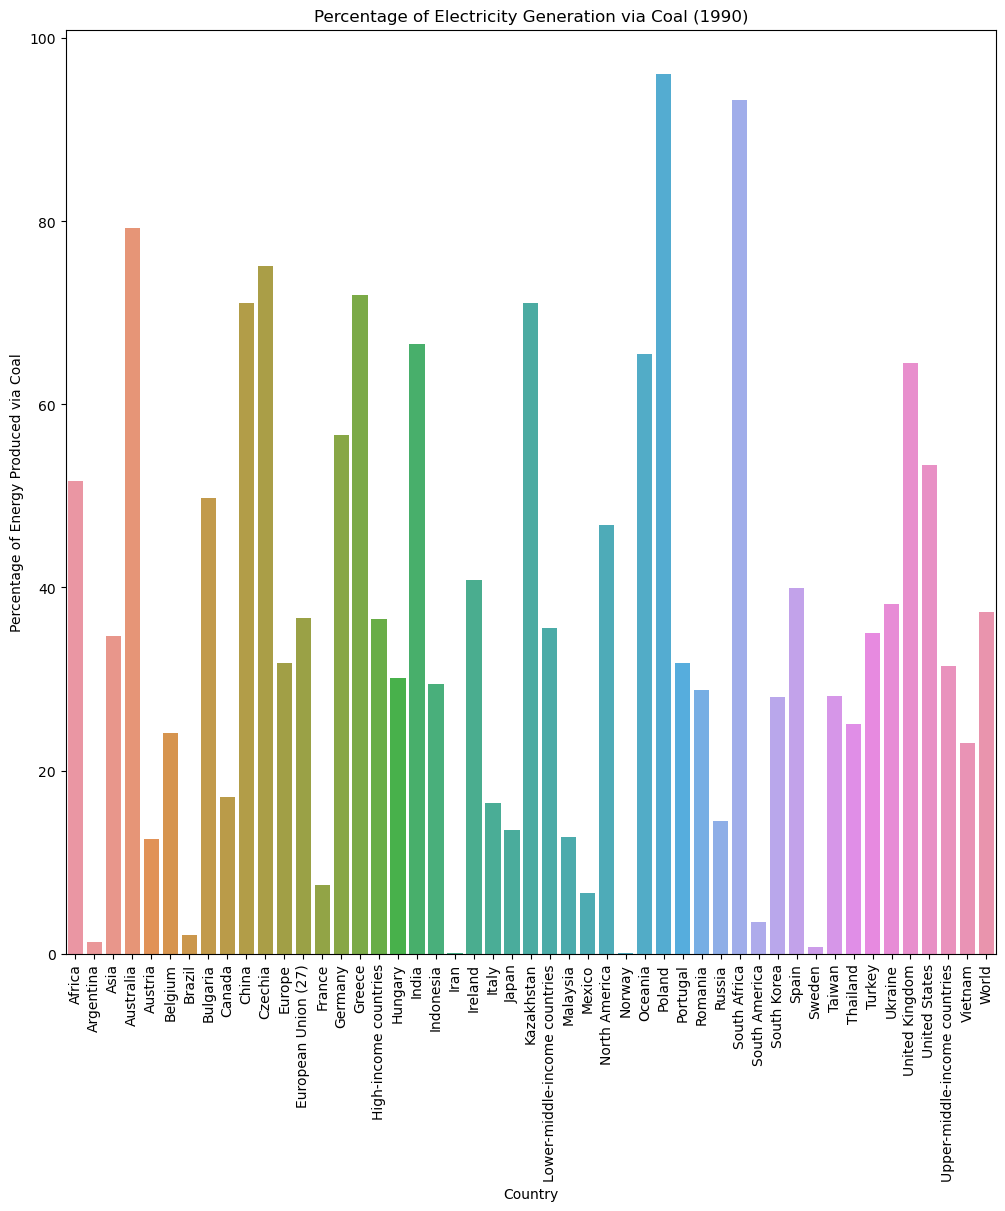

In [41]:
plt.figure(figsize=(12, 12))
sns.barplot(x='country', y='coal_share_elec', data=cleaned_df_1990)
plt.ylabel('Percentage of Energy Produced via Coal')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Percentage of Electricity Generation via Coal (1990)')

Above is a graph which represents the electricity a country generated from coal in 1990 compared to its' overall energy mix. As we can tell from the graph, the country which produced the most of its energy via coal in 1990 was South Africa. It's interesting to see that so many countries were below the average, which is around 39%.

Text(0.5, 1.0, 'Percentage of Electricity Generation via Coal (2018)')

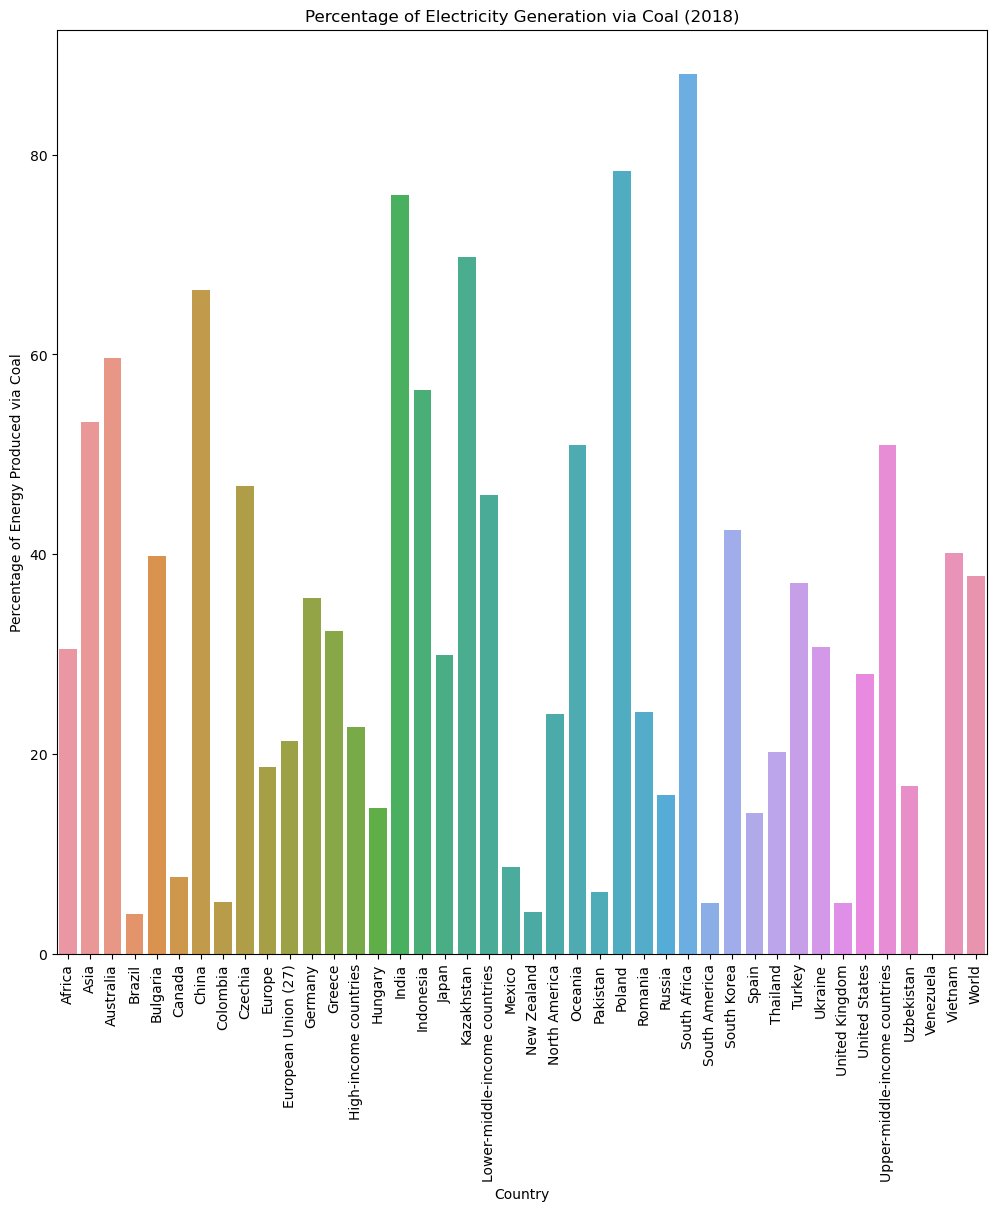

In [43]:
plt.figure(figsize=(12, 12))
sns.barplot(x='country', y='coal_share_elec', data=cleaned_df_2018)
plt.ylabel('Percentage of Energy Produced via Coal')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Percentage of Electricity Generation via Coal (2018)')

Above is a graph which represents the electricity a country generated from coal in 2018 compared to its' overall energy mix. Suprisingly, the world average remains at around the same as in 1990, which is roughly around 39%. We can also tell that South Africa still relies on mostly coal to produce their energy.

Text(0.5, 1.0, 'Electricity Generation via Coal (1990)')

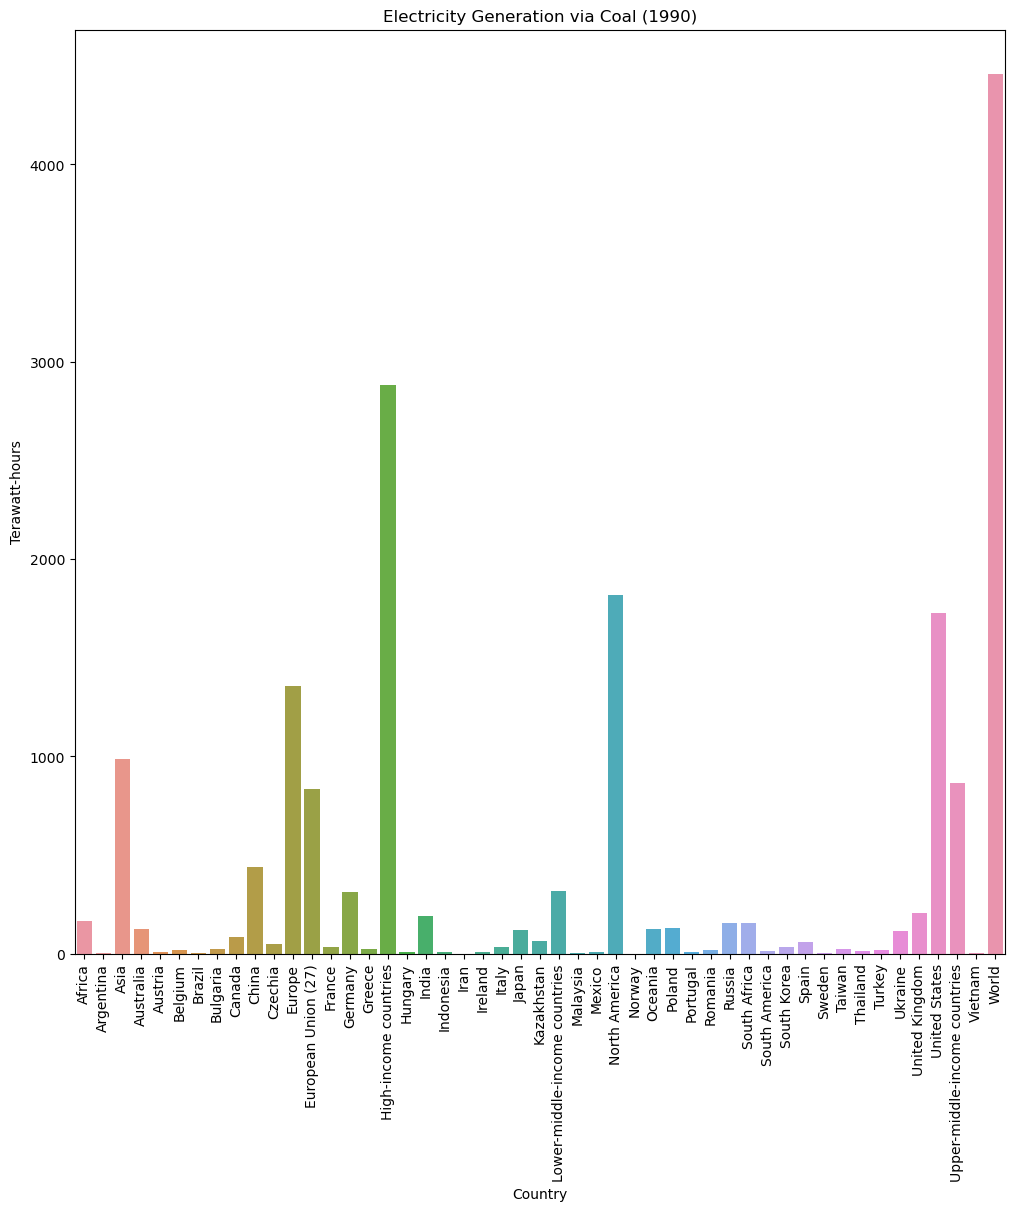

In [44]:
plt.figure(figsize=(12, 12))
sns.barplot(x='country', y='coal_electricity', data=cleaned_df_1990)
plt.ylabel('Terawatt-hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Electricity Generation via Coal (1990)')

Above is a graph which represents the electricity a country generated from coal in 1990 in terawatt-hours. As the graphs shows, the higher-income-countries produced majority of the energy via coal in 1990, which was majorly dominated by the United States. The United States produced roughly 30% of the world's total energy via coal!

Text(0.5, 1.0, 'Electricity Generation via Coal (2018)')

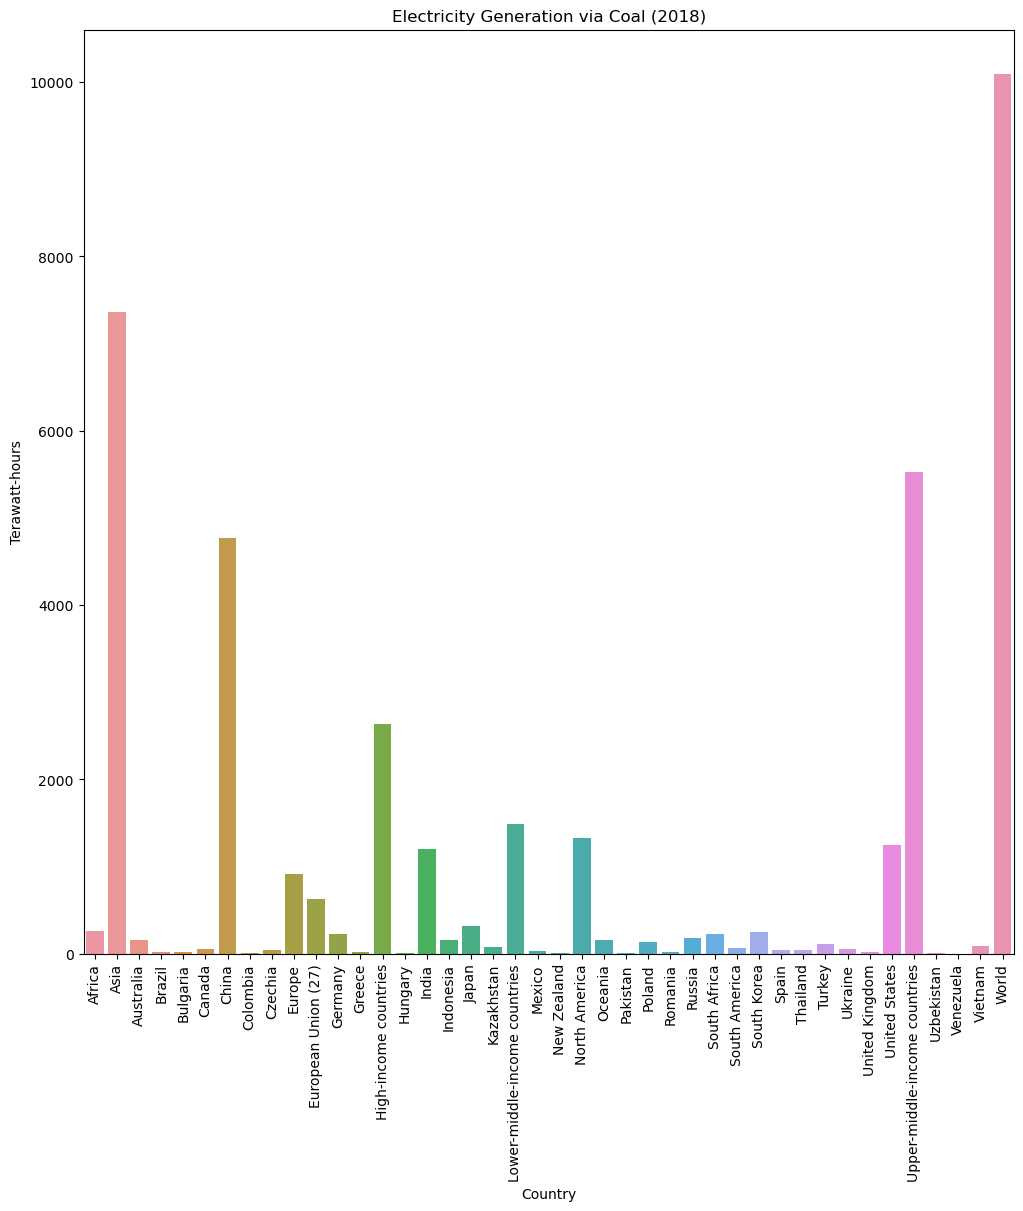

In [45]:
plt.figure(figsize=(12, 12))
sns.barplot(x='country', y='coal_electricity', data=cleaned_df_2018)
plt.ylabel('Terawatt-hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Electricity Generation via Coal (2018)')

Above is a graph which represents the electricity a country generated from coal in 2018 in terawatt-hours. Unsuprisingly, the world's total energy production has nearly doubled, from around 4500 terawatt-hours in 1990 to around 10000 terawatt-hours in 2018. Surprisingly, the United States has stayed stagnant in their production while China has become the leader of energy production via coal, with about 4500 terawatt-hours produced in 2018 (this was the global total in 1990)!

Text(0.5, 1.0, 'Annual Change in Coal Production')

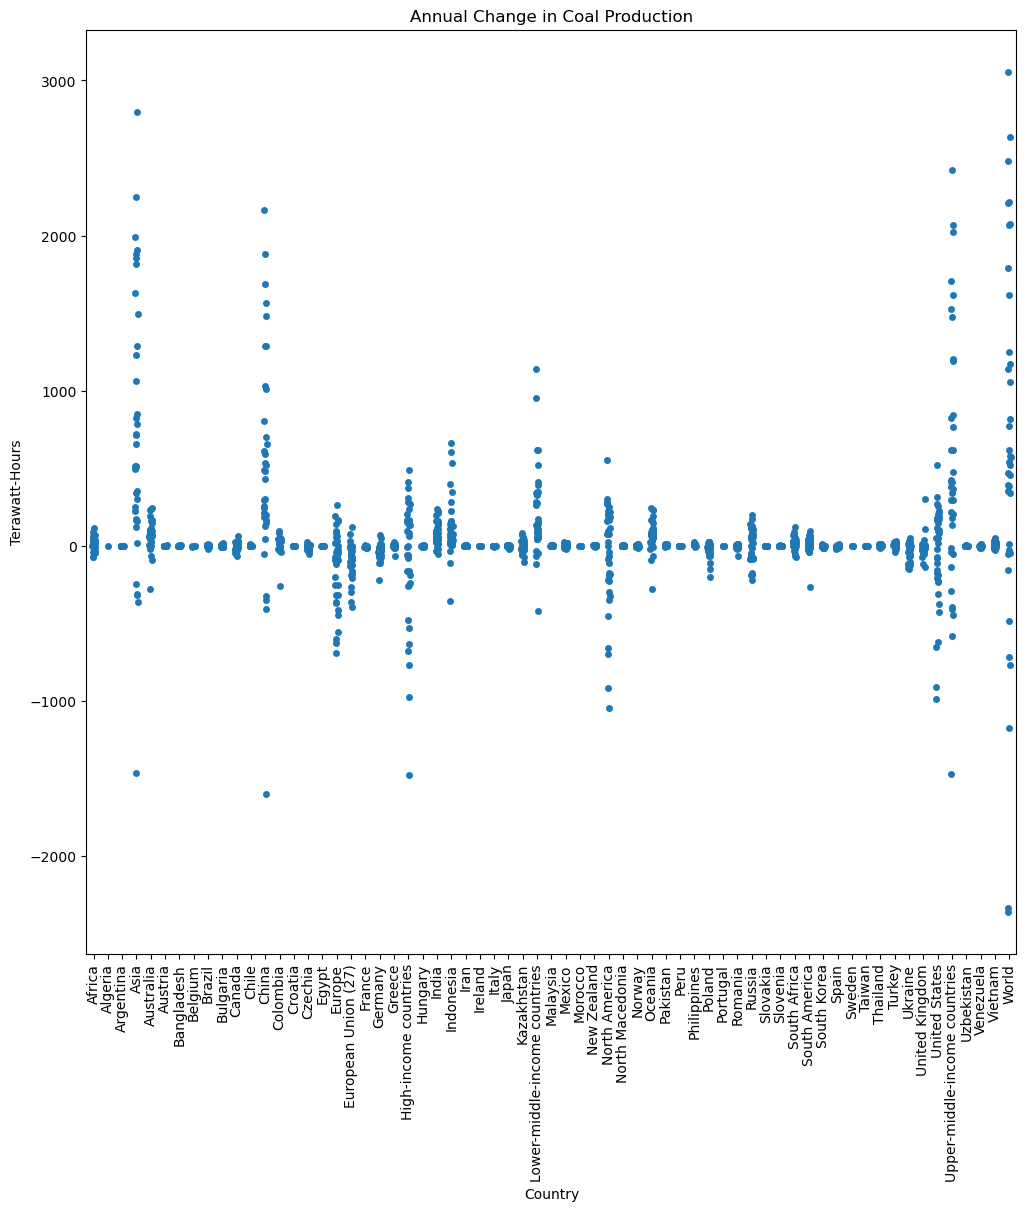

In [55]:
plt.figure(figsize=(12, 12))
sns.stripplot(x='country', y='coal_prod_change_twh', data=cleaned_df)
plt.ylabel('Terawatt-Hours')
#Annual change in coal consumption, measured in
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Annual Change in Coal Production')

Above is a strip plot which represents the annual change in coal production in Terawatt-hours compared to the year before for each year. As you can see, China made the largest change in production in a given year. Let's try to figure out which year that was!

In [54]:
coal_prod_df = cleaned_df.sort_values('coal_prod_change_twh', ascending=False)
coal_prod_df = coal_prod_df[['country', 'year', 'coal_prod_change_twh']]
print(coal_prod_df.head(10))

                             country  year  coal_prod_change_twh
21955                          World  2011              3057.059
1202                            Asia  2011              2799.049
21948                          World  2004              2632.568
21965                          World  2021              2482.133
21283  Upper-middle-income countries  2011              2422.064
1195                            Asia  2004              2249.432
21954                          World  2010              2214.898
21962                          World  2018              2209.914
4273                           China  2011              2167.818
21947                          World  2003              2073.594


China increased their coal production in 2011 by 2168 terawatt-hours! That accounted for roughly 70% of the World's increase in 2011!

Text(0.5, 1.0, 'Annual Change in Coal Consumption')

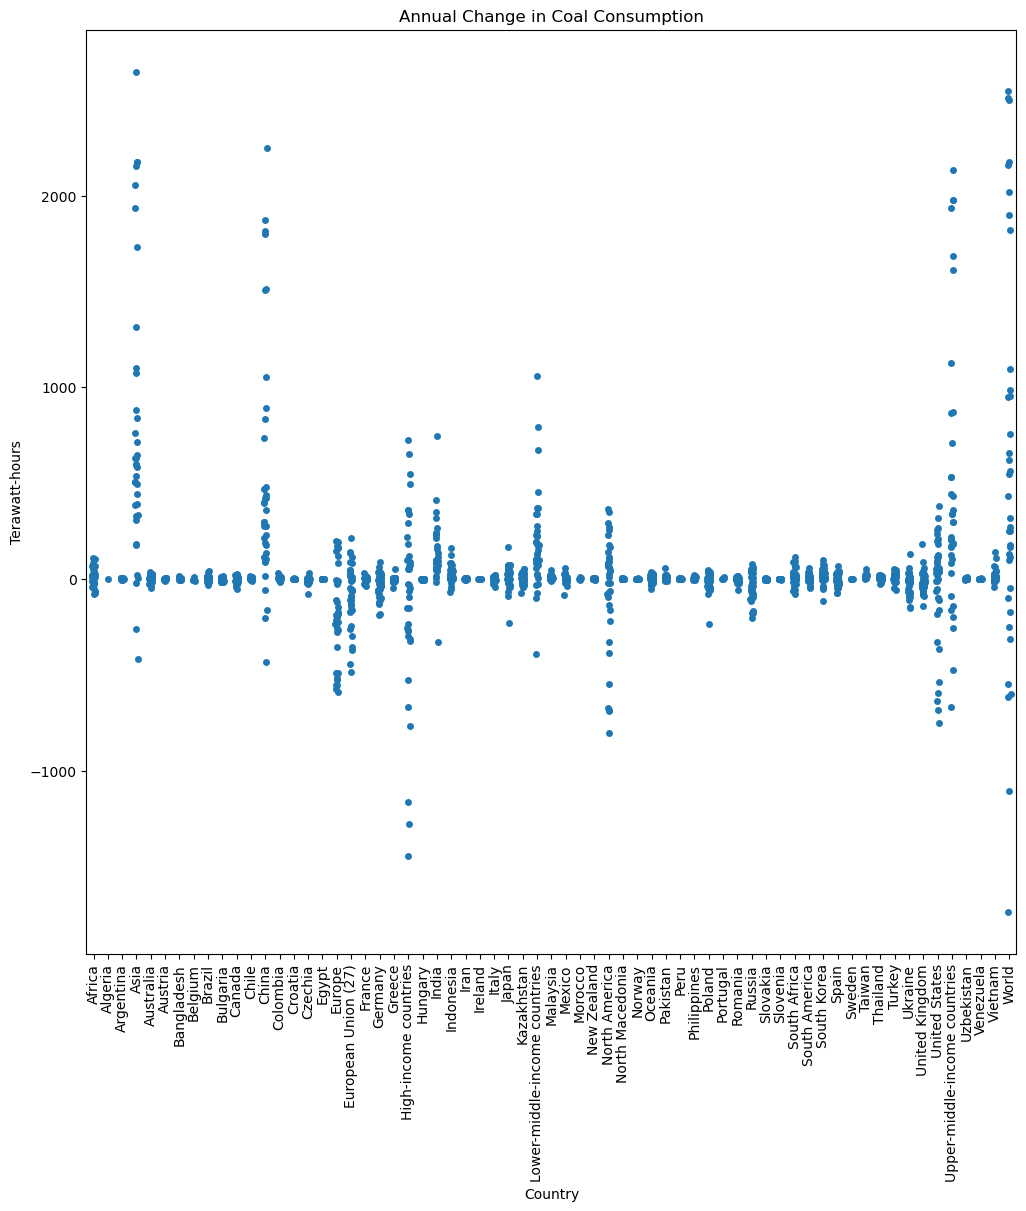

In [52]:
plt.figure(figsize=(12, 12))
sns.stripplot(x='country', y='coal_cons_change_twh', data=cleaned_df)
plt.ylabel('Terawatt-hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Annual Change in Coal Consumption')

Above is a strip plot which represents the annual change in coal consumption in Terawatt-hours compared to the year before for each year. China also made the largest change in coal consumption in a year as well, lets figure out if their largest change in consumption happened in the same year that their largest change in production happened?

In [52]:
coal_con_df = cleaned_df.sort_values('coal_cons_change_twh', ascending=False)
coal_con_df = coal_con_df[['country', 'year', 'coal_cons_change_twh']]
print(coal_con_df.head(10))

      country  year  coal_cons_change_twh
1196     Asia  2005              2646.756
21947   World  2003              2544.129
21965   World  2021              2509.234
21949   World  2005              2496.043
4267    China  2005              2249.825
1194     Asia  2003              2174.584
21948   World  2004              2173.779
1202     Asia  2011              2172.768
21951   World  2007              2159.383
1195     Asia  2004              2152.898


Surprisingly not! Lets see what their change in consumption was for 2011!

In [61]:
coal_con_df_2011 = coal_con_df.loc[coal_con_df["year"] == 2011]
print(coal_con_df_2011.head(10))

                             country  year  coal_cons_change_twh
1202                            Asia  2011              2172.768
21955                          World  2011              2020.906
21283  Upper-middle-income countries  2011              1937.342
4273                           China  2011              1801.529
10980  Lower-middle-income countries  2011               336.992
6506                          Europe  2011               191.720
9126                           India  2011               170.406
9248                       Indonesia  2011                84.807
6802             European Union (27)  2011                83.007
18412                    South Korea  2011                76.125


As we can see, it was 1802 terawatt-hours. That means China produced nearly 366 terawatts-hours more than they needed. 

# Milestone 3 Task 2:

## Analysis Pipeline

### Load Data
Load the data through a relative path.

In [ ]:
# df = pd.read_csv('../data/raw/owid-energy-data.csv')

### Clean, Process, and Wrangle Data
Keep only the relevant columns, then drop all NaN cells and create three dataframes, one for all of the years, one for the year 1990, and one for the year 2018.

In [5]:
# df = df[['country', 'year', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy']]
# df_dropna = df.dropna()
# cleaned_df = df_dropna
# cleaned_df.sort_values('year', ascending = True)
# cleaned_df_1990 = cleaned_df.loc[cleaned_df["year"] == 1990]
# cleaned_df_2018 = cleaned_df.loc[cleaned_df["year"] == 2018]

The data is in optimal format to use, therefore I don't need to process/wrangle it as much.

# Milestone 3 Task 3:

## Method Chaining and Writing Python Functions

In [10]:
# # Function to load data
# def load_data(path):
#     raw_data = pd.read_csv(path)
#     return raw_data;

# # Function to only keep the necessary columns and remove NaN cells
# def clean_data(dataframe):
#     cleaned_df = dataframe[['country', 'year', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy']]
#     cleaned_df = cleaned_df.dropna()
#     return cleaned_df

# # Function to create a data frame for 1990 values
# def data_1990(path):
#     df = load_data(path)
#     df = clean_data(path)
#     df = df.loc[df["year"] == 1990]
#     return df

# # Function to create a data frame for 2018 values
# def data_1990(path):
#     df = load_data(path)
#     df = clean_data(path)
#     df = df.loc[df["year"] == 2018]
#     return df


# # Function that wraps together the method chains
# def load_and_process(path):
#     # Method Chain 1
#     df1 = (
#         pd.read_csv(path)[['country', 'year', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy']]
#         .dropna()
#     )
#     # Method Chain 2
#     df2 = (
#         df1
#         # rename columns to make data appear much more readable when looking at just the data
#         .rename(columns={'year' : 'Year', 'country' : 'Country'})
#         .rename(columns={'coal_cons_change_pct' : 'Annual percentage change in coal consumption', 'coal_cons_change_twh' : 'Annual change in coal consumption, measured in terawatt-hours'})
#         .rename(columns={'coal_cons_per_capita' : 'Per capita primary energy consumption from coal, measured in kilowatt-hours', 'coal_consumption' : 'Primary energy consumption from coal, measured in terawatt-hours'})
#         .rename(columns={'coal_elec_per_capita' : 'Per capita electricity generation from coal, measured in kilowatt-hours', 'coal_electricity' : 'Electricity generation from coal, measured in terawatt-hours	'})
#         .rename(columns={'coal_prod_change_pct' : 'Annual percentage change in coal production', 'coal_prod_change_twh' : 'Annual change in coal production, measured in terawatt-hours'})
#         .rename(columns={'coal_prod_per_capita' : 'Per capita coal production, measured in kilowatt-hours', 'coal_production' : 'Coal production, measured in terawatt-hours'})
#         .rename(columns={'coal_share_elec' : 'Share of electricity generation that comes from coal', 'coal_share_energy' : 'Share of primary energy consumption that comes from coal'})
#         .sort_values('Year', ascending = True)
#     )
#     return df2
    
# df6 = load_and_process("../data/raw/owid-energy-data.csv")
# df6

All the code above has been moved into project_functions2.py.

In [ ]:
import project_functions2

dfTest = project_functions2.load_and_process("../data/raw/owid-energy-data.csv")
dfTest